# FBB good presentation, good plots. Ok legend but nowhere there is intrpretation of the results! You should do a lot more on the interpretation side. WHy are all these regression lines different, which one should one choose??

# The notebook is a "presentation". The most important part of the presentation is how you show me how the data take to your conclusions.

# In the conclusions, though you have some good points, you missed the covariance of race and income which invalidates the first part of the analysis (and perhaps the second too)

# look for more comments int he cells containing FBB

# use markdown cells for your captions so that they are more readable



In [92]:
from __future__ import print_function, division
import sys
import os
import numpy
import pylab as pl
import pandas as pd
from scipy.optimize import curve_fit, minimize
import jsona
import os
from scipy.optimize import minimize

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [93]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [94]:
allmales = {'all':None, 'white':None, 'black':None, 'hispanic':None, 'asian':None}

In [95]:
allfemales = {'all':None, 'white':None, 'black':None, 'hispanic':None, 'asian':None}

In [16]:
# 1) These are the two python dictionaries where I will store my data.</b></i>

In [96]:
allmales['all'] = pd.read_excel( url + 'pinc08_2_1_1.xls', header=9)
allmales['white'] = pd.read_excel( url + 'pinc08_2_1_4.xls', header=9)
allmales['black'] = pd.read_excel( url + 'pinc08_2_1_6.xls', header=9)
allmales['asian'] = pd.read_excel( url + 'pinc08_2_1_8.xls', header=9)
allmales['hispanic'] = pd.read_excel( url + 'pinc08_2_1_9.xls', header=9)

In [97]:
allfemales['all'] = pd.read_excel( url + 'pinc08_3_1_1.xls', header=9)
allfemales['white'] = pd.read_excel( url + 'pinc08_3_1_4.xls', header=9)
allfemales['black'] = pd.read_excel( url + 'pinc08_3_1_6.xls', header=9)
allfemales['asian'] = pd.read_excel( url + 'pinc08_3_1_8.xls', header=9)
allfemales['hispanic'] = pd.read_excel( url + 'pinc08_3_1_9.xls', header=9)

In [98]:
allfemales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732,399,20942,1123,0.65,0.0162


In [99]:
allfemales['all'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

In [100]:
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### hispanic
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         1908.739130            274.282609        137.717391   
std          3688.718088            568.547923        199.157298   
min             1.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14034.000000           2704.000000        783.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         154.043478        188.913043          175.173913   
std          259.111813        321.948569          341.577016   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN      

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean          809.478261            150.347826         42.413043   
std          1476.967354            439.113765         59.593652   
min             2.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max          5648.000000           2178.000000        224.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean          53.934783         59.434783           56.717391   
std           82.427989         95.528623           93.491215   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN                 NaN 

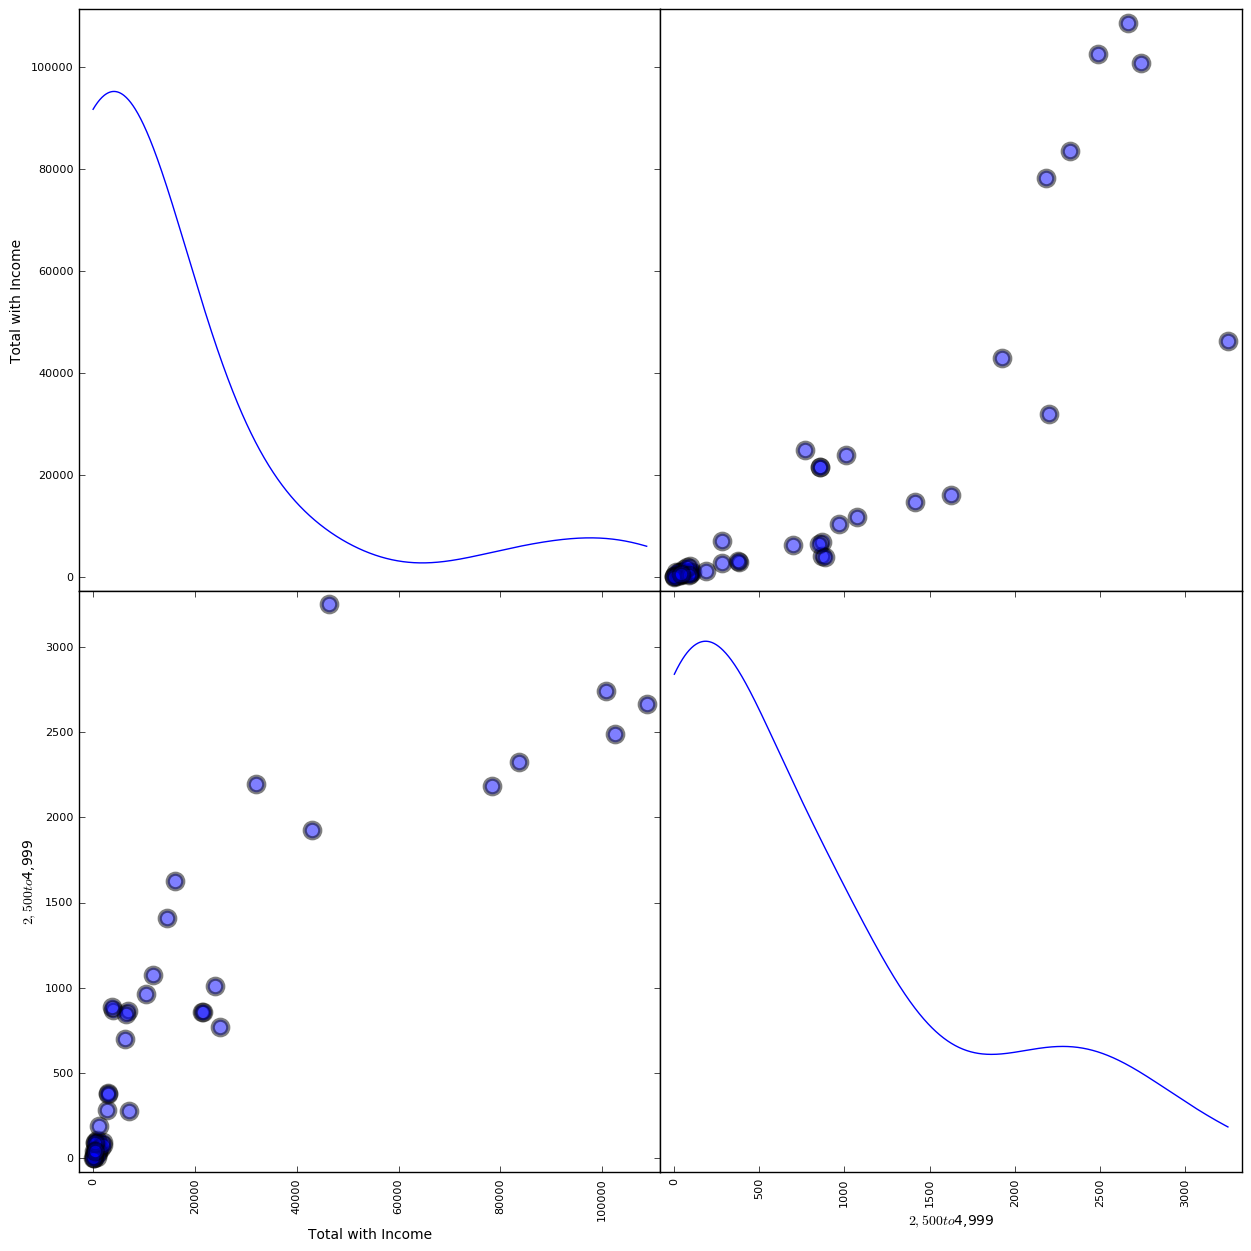

In [101]:
fig = pd.scatter_matrix(allmales['all']
                       [[u'Total with Income',u'$2,500 to $4,999',
                         u'Median income',u'Gini ratio']],
                       linewidth= 3, s=500, figsize=(15,15),
                           diagonal='kde')

# FBB missing figure caption

In [102]:
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [103]:
for gender in [allmales, allfemales]:
    for k in gender:
        isreal = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] = np.nan
                gender[k][c] = gender[k][c].astype(float)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


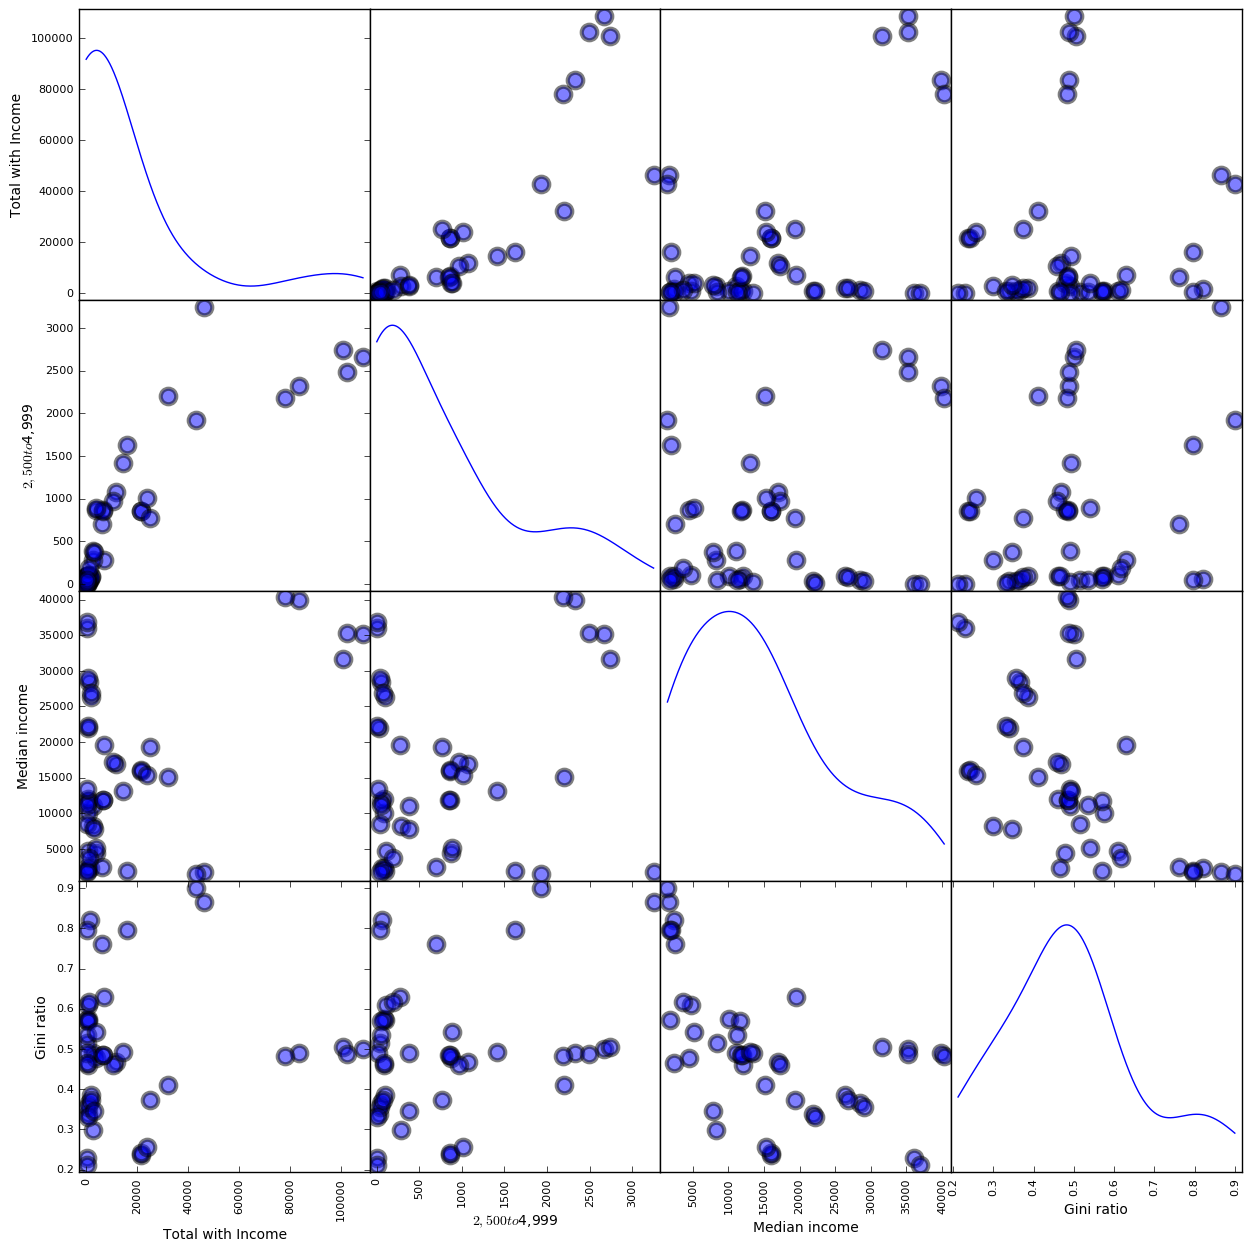

In [105]:
fig = pd.scatter_matrix(allmales['all']
                       [[u'Total with Income',u'$2,500 to $4,999',
                         u'Median income',u'Gini ratio']],
                       linewidth= 3, s=500, figsize=(15,15),
                           diagonal='kde')

# 2) This scatter plot shows four columns of "allmale" income data plotted against each other - "Total with income," 
# "2,500-4,999," "Median income," and Gini ratio" - for each income characteristic (earnings, social security, etc.).

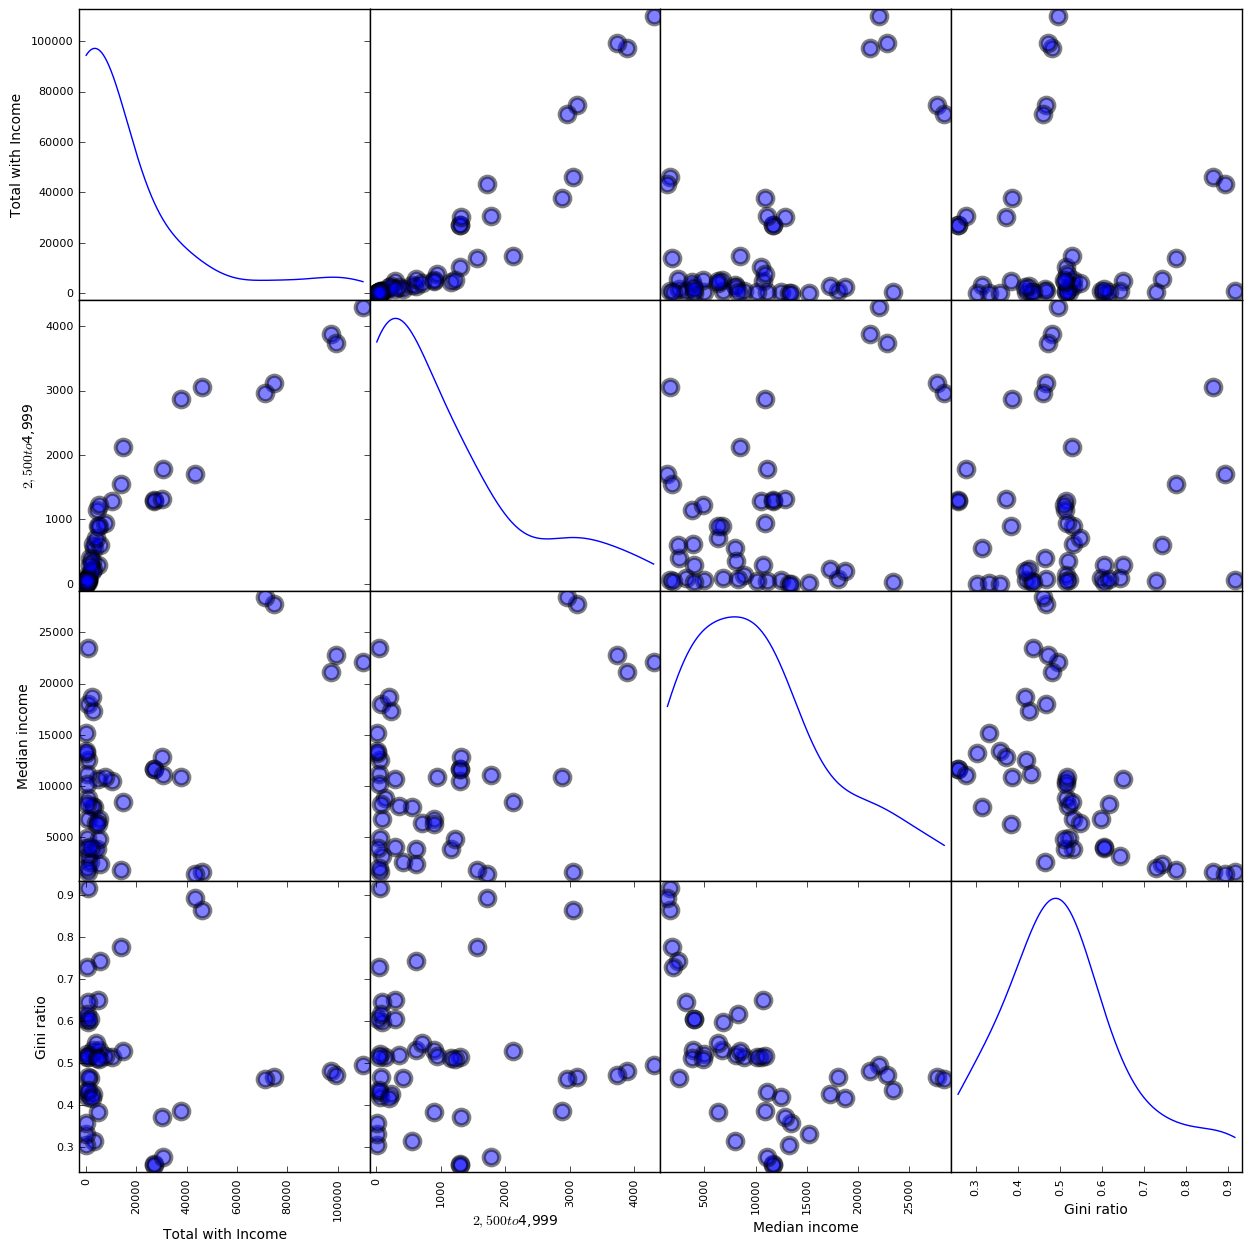

In [106]:
fig = pd.scatter_matrix(allfemales['all']
                       [[u'Total with Income',u'$2,500 to $4,999',
                         u'Median income',u'Gini ratio']],
                       linewidth= 3, s=500, figsize=(15,15),
                           diagonal='kde')

# 2b) This scatter plot shows four columns of "allfemale" income data plotted against each other - "Total with income,"
# "2,500-4,999," "Median income," and Gini ratio" - for each income characteristic (earnings, social security, etc.).

In [107]:
income = pd.DataFrame(columns=['males','females'], index=['all','white','black','hispanic','asian'])

In [108]:
for k in allfemales:
    income["males"][k] = allmales[k]["Median income"][1]
    income["females"][k] = allfemales[k]["Median income"][1]

In [109]:
males = np.array(list(income["males"]))
females = np.array(list(income["females"]))

In [110]:
def linear(x):
    return x

In [111]:
params = np.polyfit(males, females, 1)

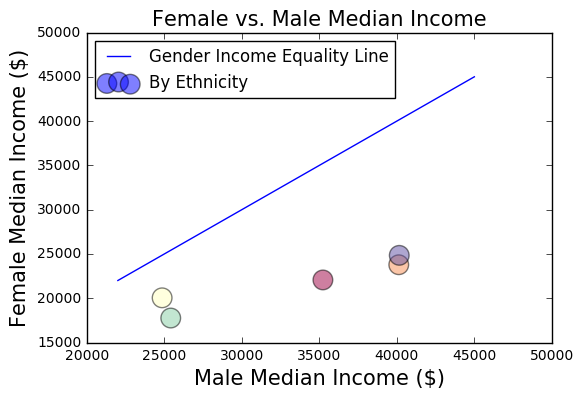

In [123]:
pl.scatter(males, females, c=range(1,6), s=200, alpha=0.5,
          cmap = plt.get_cmap('Spectral'), label='By Ethnicity')
x=np.arange(22000,45000)
pl.plot(x,linear(x), label='Gender Income Equality Line')
pl.xlabel("Male Median Income ($)", fontsize=15)
pl.ylabel("Female Median Income ($)", fontsize=15)
pl.title("Female vs. Male Median Income", fontsize=15)
pl.legend(loc='best')

# 3) This is a plot of female median income vs. male median income, with each color-coded point representing an ethnicity pair.  
# Based on the "Gender Income Equality Line," it is clear that males out-earn females across the ethnicity spectrum.

# FBB good

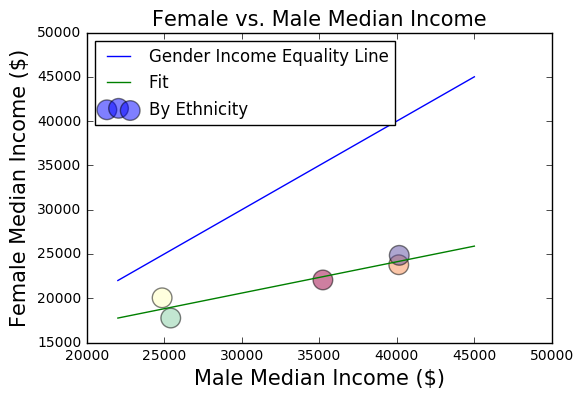

In [124]:
def fit(x, a, b):
    return a+b*x

pl.scatter(males, females, c=range(1,6), s=200, alpha=0.5,  
           cmap = plt.get_cmap('Spectral'), label='By Ethnicity') 
x=np.arange(22000,45000)
pl.plot(x,linear(x), label='Gender Income Equality Line')
pl.plot(x,fit(x,params[1],params[0]), label='Fit')
pl.xlabel("Male Median Income ($)", fontsize=15)
pl.ylabel("Female Median Income ($)", fontsize=15)
pl.title("Female vs. Male Median Income", fontsize=15)
pl.legend(loc='best')

# 4) The green line is a fit through the female median income vs. male median income plot.

# FBB add wha the fit method is and the parameters of the line in your comment cell

In [114]:
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()

# FBB do not leave output without explaination inf your delivery ready versino of the notebook
beta0, beta1

(2224.360976045471, 0.5739482903542108)

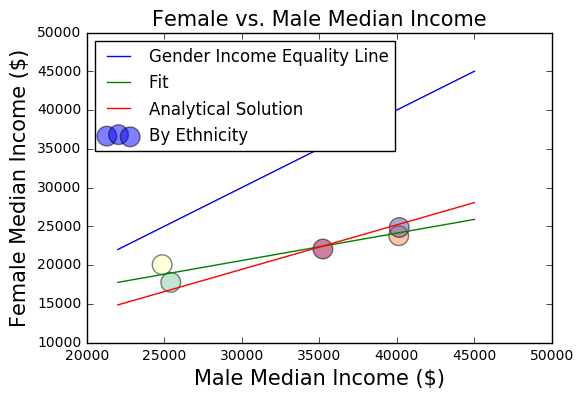

In [125]:
pl.scatter(males, females, c=range(1,6), s=200, alpha=0.5,  
           cmap = plt.get_cmap('Spectral'), label='By Ethnicity') 
x=np.arange(22000,45000)
pl.plot(x,linear(x), label='Gender Income Equality Line')
pl.plot(x,fit(x,params[1],params[0]), label='Fit')
pl.plot(x,fit(x,beta0,beta1), label='Analytical Solution')
pl.xlabel("Male Median Income ($)", fontsize=15)
pl.ylabel("Female Median Income ($)", fontsize=15)
pl.title("Female vs. Male Median Income", fontsize=15)
pl.legend(loc='best')

# 4b) Added the analytcal solution line based on the Spearman's test and betas calculated.

# FBB how do the lines compare?? why re they different?

In [116]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())

#IDepending on what you use to fit you may need to remove NaN values 
#I am gonna create the mask in the next line. 
#the mask is False where either male or female value is NaN. 
#Notice that True is really just >1, and False really 0. 
#so i can add the male and female mask and the resulting mask will be 
#False where both arrays are not Nan, and true otherwise. 

mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))
# now you can use mask as an index (broadcasting) to select the non NaN values

In [117]:
params_all = np.polyfit(all_males_allincomes[mask], all_females_allincomes[mask],1)
cor = stats.spearmanr(all_males_allincomes[mask], all_females_allincomes[mask])
beta1_all = cor[0] * all_females_allincomes[mask].std() / all_males_allincomes[mask].std()
beta0_all = all_females_allincomes[mask].mean() - beta1 * all_males_allincomes[mask].mean()
beta0_all, beta1_all

(2017.5716833944716, 0.62234483903975324)

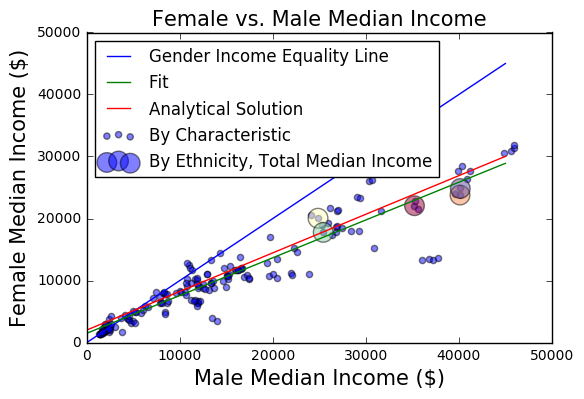

In [127]:
pl.scatter(all_males_allincomes[mask], all_females_allincomes[mask], s=20, alpha=0.5,
           cmap = plt.get_cmap('Spectral'), label='By Characteristic')
pl.scatter(males, females, c=range(1,6), s=200, alpha=0.5,
          cmap = plt.get_cmap('Spectral'), label='By Ethnicity, Total Median Income')
x=np.arange(0,45000)
pl.plot(x,linear(x), label='Gender Income Equality Line')
pl.plot(x,fit(x,params_all[1],params_all[0]), label='Fit')
pl.plot(x,fit(x,beta0_all,beta1_all), label='Analytical Solution')
pl.xlabel("Male Median Income ($)", fontsize=15)
pl.ylabel("Female Median Income ($)", fontsize=15)
pl.title("Female vs. Male Median Income", fontsize=15)
pl.xlim(left=0)
pl.ylim(bottom=0)
pl.legend(loc='best')

# 5) This is the plot of female vs. male median income, with the smaller scatter spectrum representing each income source 
# characteristic and the larger scatter spectrum representing the aggregate total median income (by ethnicity).  The blue 
# line represents the Gender Income Equality Line, the green a fit line, and the red an analytical line based off of the 
# Spearman's test.

# FBB how do they compare? why is the fit to all data more similar to the analytical solution than to the fit to the aggregate data?

In [119]:
test_pay = 100000
print ("Sample pay: ${}".format(test_pay))
female_pay = fit(test_pay, params_all[1], params_all[0]) # prediction
print ("Female Pay by fit function: ${}".format(female_pay))
fe_pay = fit(test_pay,beta0_all, beta1_all)
print ("female pay by analytical solution: ${}".format(fe_pay))

Sample pay: $100000
Female Pay by fit function: $62395.091802893534
female pay by analytical solution: $64252.05558736979


In [11]:
# 6) Given a sample stipend of $100,000 for a male, we predict the above salaries for a female in the same position.

In [120]:
income

,males,females
all,35228,22063
white,40122,23780
black,24855,20044
hispanic,25411,17762
asian,40153,24840


# 7) The data tells us that white and Asian incomes are closely aligned, as are black and Hispanic incomes.  Along the same 
# vein as this exercise, we can, for example, predict the expected salary of a black male in a role given the salary of a white 
# male in an equivalent role.  We can do this by plotting black male income vs. white male income, run regression analyses, and 
# obtain the coeffecients in the equation establishing the correlation.

# FBB  that is a fine idea, but not only because we are comparing without knowing the job position, olso, importantly, because ethnicity is covariant with income, which may invalidate the analysis (see my solution)¶
